# Codequalität

Jupyter-Notebooks wurden ursprünglich entwickelt, um als *Labor* für Datenanalyse verwendet werden zu können. Häufig wirst du sie allerdings in deinen normalen Workflow einbauen und damit wie in einer web-basierten IDE arbeiten.

Dabei gibt es einige Besonderheiten zu beachten, die du hier gleich kennenlernen wirst.

## Out-of-order Execution

Normalerweise führst du die Zellen in einem Jupyter-Notebook von *oben nach unten aus*.

Häufig beginnst du mit einem `import`:

In [1]:
import pandas as pd
import numpy as np

Hier erzeugst du jetzt einen `DataFrame`, der eine Sinusfunktion in der y-Koordinate enhält. Die x-Koordinate ist linear unterteilt von `-5` bis `5` in Schritten von `0.05`, damit sich eine stetige Kurve ergibt:

In [2]:
df = pd.DataFrame({ "x": np.arange(-5, 5, 0.05), 
                    "y": np.sin(np.arange(-5, 5, 0.05)) })

Wenn du dir das Ergebnis als Diagramm ausgeben lässt, siehst du, dass das gut geklappt hat.

<AxesSubplot:xlabel='x', ylabel='y'>

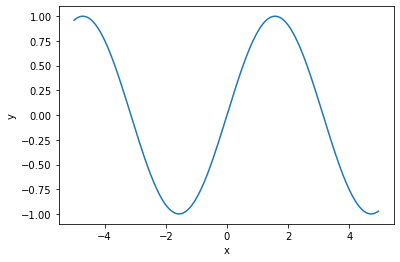

In [3]:
import seaborn as sns
sns.lineplot(x="x", y="y", data=df)

Jetzt interessierst du dich für die *Exponentialfunktion* und lässt diese genau wie oben ausgeben:

<AxesSubplot:xlabel='x'>

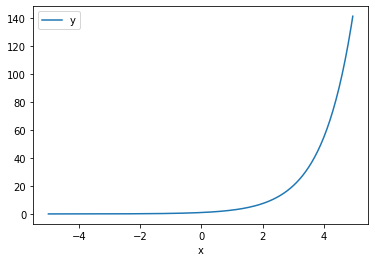

In [4]:
df = pd.DataFrame({ "x": np.arange(-5, 5, 0.05), 
                    "y": np.exp(np.arange(-5, 5, 0.05)) })
df.set_index("x").plot()

Der *Stil* gefällt dir noch nicht, der lässt sich leicht ändern:

In [5]:
import matplotlib
matplotlib.style.use('ggplot')

Wie sieht das jetzt aus?

<AxesSubplot:xlabel='x'>

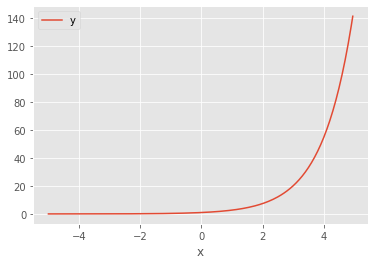

In [6]:
df.set_index("x").plot()

Das ist viel besser, und du willst das nun auch auf den Sinus oben anwenden!

Dabei entstehen gleich mehrere Probleme:
* Der Sinus ist verschwunden und stattdessen wird auch die Exponentialfunktion angewendet.
* Beim nächsten Durchlauf ist der Style des Sinus-Plot wieder der ursprüngliche.

Das Notebook ist also *inkonsistent* geworden. Und das ist noch ein relativ einfacher Fall.

Nutze nun `seaborn` zum Plot:

In [7]:
import seaborn as sns

Die Aufrufsyntax ist etwas anders, aber auch intuitiv:

<AxesSubplot:xlabel='x', ylabel='y'>

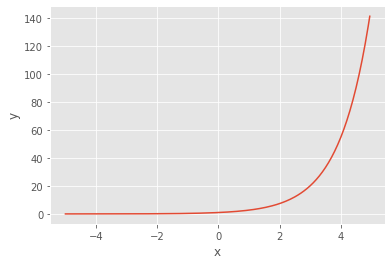

In [8]:
sns.lineplot(x="x", y="y", data=df)

Nocmh besser mit den Achsenbeschriftungen! Setze das auch oben ein.

Nun entsteht ein neues Problem, das Notebook ist in Zukunft so gar nicht mehr ablauffähig, weil du oben `sns` vor dem Import verwendet. 

Diese Fälle treten leider sehr häufig auf und sind auf die *Ablaufreihenfolge* zurückzuführen. Sie haben auch noch andere Gründe:
* Nutzung von globalen Variablen
* Nutzung von globalen Einstellungen
* Nutzung von globalem Import

Prinzipiell könntest du das natürlich alles vermeiden und den Code in *Funktionen kapseln*. Dadurch geht allerdings viel von der Interaktivität der Jupyter-Notebooks verloren und der Spaß bleibt auf der Strecke.

Um das Problem an der Wurzel zu bekämpfen, solltest du alle Notebooks nach "Fertigstellung" nochmal von vorne laufen lassen. Dazu gibt es die Funktion *Kernel / Restart & Run All*. Zugegebenermaßen ist es *nervig*, das immer wieder aufzurufen. Du solltest es dir trotzdem auf jeden Fall angewöhnen. Es ist sehr unerfreulich, wenn du ein Notebook nach vielen Monaten wieder benötigst und *erst dann* merkst, dass es nicht mehr funktioniert. Nun hast du es nämlich viel schwerer, den Fehler zu finden, weil du dich erst wieder mit dem Code vertraut machen musst.

## Unvollständige Datenmanipulation

In [9]:
stop

NameError: name 'stop' is not defined

`pandas` ermöglicht dir eine sehr komfortable Selektion (Filterung) von Teildatensets: 

In [10]:
part = df[df["x"] > 0]
part

,x,y
101,0.05,1.051271
102,0.10,1.105171
103,0.15,1.161834
104,0.20,1.221403
105,0.25,1.284025
...,...,...
195,4.75,115.584285
196,4.80,121.510418
197,4.85,127.740390
198,4.90,134.289780


Das funktioniert, weil `df["x"] > 0` ein `boolean`-Array zurückliefert und dieses als Index verwendet nur die Werte zurückliefert, bei denen der Wert `True` ist

In [11]:
df["x"] > 0

0      False
1      False
2      False
3      False
4      False
       ...  
195     True
196     True
197     True
198     True
199     True
Name: x, Length: 200, dtype: bool

Nun kannst du in dem *Teildatenset* eine neue Variable setzen:

In [12]:
part["z"] = np.log(part["x"])

<ipython-input-12-4b672a6c3324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part["z"] = np.log(part["x"])


Die Fehlermeldung *verheißt nichts Gutes*. Die Variable `part` ist zwar richtig gesetzt, aber auf `df` hatte das keinen Effekt:

In [13]:
part

,x,y,z
101,0.05,1.051271,-2.995732
102,0.10,1.105171,-2.302585
103,0.15,1.161834,-1.897120
104,0.20,1.221403,-1.609438
105,0.25,1.284025,-1.386294
...,...,...,...
195,4.75,115.584285,1.558145
196,4.80,121.510418,1.568616
197,4.85,127.740390,1.578979
198,4.90,134.289780,1.589235


In [14]:
df

,x,y
0,-5.00,0.006738
1,-4.95,0.007083
2,-4.90,0.007447
3,-4.85,0.007828
4,-4.80,0.008230
...,...,...
195,4.75,115.584285
196,4.80,121.510418
197,4.85,127.740390
198,4.90,134.289780


Das Problem liegt daran, dass `df[df["x] > 0]` lediglich *Verweise* auf den `DataFrame` anlegt. Du kannst die Fehlermeldung vermeiden, indem du noch ein `.copy()` einfügst:

In [15]:
part = df[df["x"] > 0].copy()
part["z"] = np.log(part["x"])
part

,x,y,z
101,0.05,1.051271,-2.995732
102,0.10,1.105171,-2.302585
103,0.15,1.161834,-1.897120
104,0.20,1.221403,-1.609438
105,0.25,1.284025,-1.386294
...,...,...,...
195,4.75,115.584285,1.558145
196,4.80,121.510418,1.568616
197,4.85,127.740390,1.578979
198,4.90,134.289780,1.589235


Achtung: `.copy()` benötigt zusätzlichen Speicherplatz. Oft wirst du es doch als eine enorm praktische Methode verwenden, um *nebenwirkungsfrei* auf Teilmengen von Daten zugreifen zu können. 

## `git`-Integration

Wenn du dich mit Softwareentwicklung beschäftigst, bist du sicher auch schon mit [`git`](https://git-scm.com/) vertraut. Ursprünglich für den Linux-Kernel entwickelt, ist es heute der *de-facto-Standard* für Konfigurationsmanagement und Versionskontrolle.

Leider eignen sich Jupyter-Notebook nicht besonders gut, um in `git` eingecheckt zu werden. Das liegt daran, dass neben den Code- und Dokumentationszellen auch alle Ausgaben von Python in den `.ipynb`-Files enthalten sind. Dadurch kannst du die echten Änderungen von einer auf die nächste Version nicht mehr erkennen.

Es gibt sog. *git hooks*, die diesen Code entfernen. Alternativ kannst du vor jedem Speichern des Notebooks die Funktion *Kernel / Restart & Clear Output* aufrufen. Eine weitere Möglichkeit ist die Verwendung eines spezielle `diff`-Programms, das die Änderungen in den Outputs nicht berücksichtigt.

## Unterschiedliche Kernel

Wenn du viel mit unterschiedlichen Projekten arbeitet, wirst du  mit unterschiedlichen Python-Paketen arbeiten wollen. Python selbst bietet mit dem `venv`-Paket dafür einen Mechanismus, der es dir erlaubt, mit unterschiedlichen Umgebungen parallel zu arbeiten. Wenn du dich daran gewöhnt hast, kannst du sehr komfortabel damit umgehen.

Glücklicherweise kannst du diesem Mechanismus auch in Jupyter-Notebooks nützen. Auch hier kannst du `venv` anlegen und die dem Notebook-Server bekannt machen. Dieser stellt dir dann unterschiedliche Kernel bereit, die mit ganz unterschiedlichen Paketen (und Paketversionen) ausgestattet sind.

Wie das genau funktioniert, ist sehr stark abhängig vom Betriebssystem und der verwendeten Python-installation (Betriebssystem oder Anaconda). Mithilfe von Suchmaschinen findest du (z.B. auf Stackoverflow) eine genau Anleitung, wie das in deinem konkreten Szenario funktionieren kann.